# import package and set read path

In [1]:
import sys
import scanpy as sc 
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
import random 
np.random.seed(1) 
random.seed(1) 
import os

os.chdir("/DATA2/zhangjingxiao/yxk/scDML_project/")
from scDML.metrics import evaluate_dataset

####################################################
dataset="Lung_two_species"
ncelltype=17
####################################################

read_dir="../evaluation/"+dataset+"/"
save_dir="../evaluation/"+dataset+"/"

os.chdir("/DATA2/zhangjingxiao/yxk/scDML_project/evaluation/")


# scDML(reassign)

In [2]:
method="scDML"
args_integrated=read_dir+method+"/"+method+"_corrected.h5ad"
adata_integrated=sc.read_h5ad(args_integrated)
print(adata_integrated)
from sklearn.metrics.cluster import adjusted_rand_score,normalized_mutual_info_score
ARI= adjusted_rand_score(adata_integrated.obs["celltype"].astype(str), adata_integrated.obs["cluster_celltype"].astype(str))
NMI= normalized_mutual_info_score(adata_integrated.obs["celltype"].astype(str), adata_integrated.obs["cluster_celltype"].astype(str))
print("ARI={}".format(ARI))
print("NMI={}".format(NMI))
results = {
'ARI': np.round(ARI,3),
'NMI': np.round(NMI,3),
'ASW_label': "--",
'ASW_label/batch': "--",
#'kBET': kBET_value[0],
 'BatchKL':"--",
 'cLISI':"--",  
 'iLISI':"--"
}
print("....................................... calculate all metric done .................................")
scDML_reassign= pd.DataFrame.from_dict(results, orient='index')
scDML_reassign.columns=[method+"(reassign)"]
scDML_reassign.to_csv(save_dir+method+"/"+dataset+"_"+method+"(reassign)_evaluation.csv")
#scDML_reassign


AnnData object with n_obs × n_vars = 20760 × 32
    obs: 'cluster_celltype', 'celltype', 'BATCH'
    obsm: 'X_emb'
ARI=0.630987099364492
NMI=0.8175533148928328
....................................... calculate all metric done .................................


# scDML(louvain)

AnnData object with n_obs × n_vars = 20760 × 32
    obs: 'cluster_celltype', 'celltype', 'BATCH'
    obsm: 'X_emb'
...................................................................................................
..........................................method=scDML.............................................
..............................calculate ari nmi according to nceltype=17...........................
louvain clustering result(resolution=0.732421875):n_cluster=17
ARI: 0.6309545281796698
NMI: 0.8174600121474352
.................................. calculate BatchKL  .............................................
BatchKL= [1] 0.591033

.................................. calculate LISI..................................................
clisi= 1.1385226256254195
ilisi= 1.1249466526015268
..................................        calculate ASW      ......................................
Silhouette score...
ASW_label= 0.6238814368844032
ASW_label/batch= 0.7866680837022854
.............

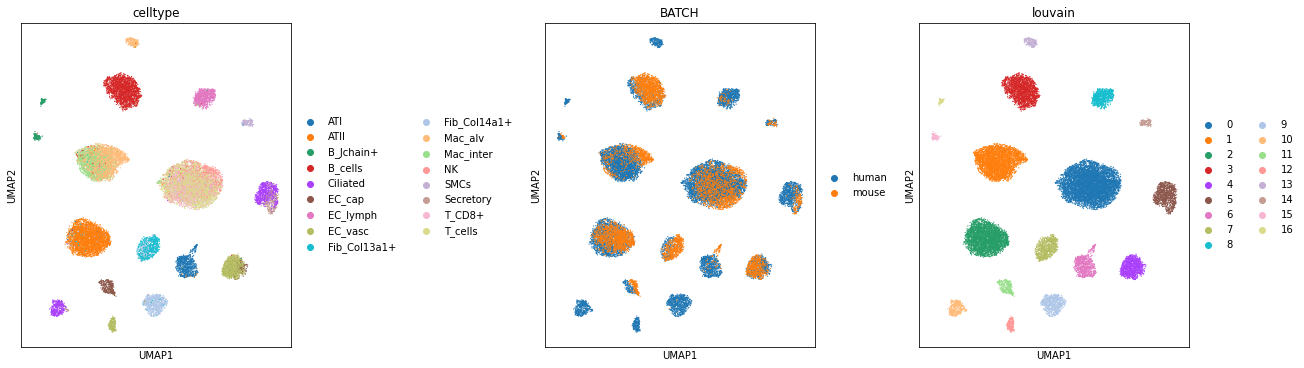

                 scDML(louvain)
ARI                       0.631
NMI                       0.817
ASW_label                 0.624
ASW_label/batch           0.787
BatchKL                   0.591
cLISI                     1.139
iLISI                     1.125


In [3]:
method="scDML"
args_integrated=read_dir+method+"/"+method+"_corrected.h5ad"
adata_integrated=sc.read_h5ad(args_integrated)
print(adata_integrated)
#adata_integrated.obsm["X_emb"]=adata_integrated.obsm["X_pca"].copy()
adata_integrated,scDML3_eva=evaluate_dataset(adata_integrated,method=method,n_celltype=ncelltype)
# sc.tl.pca(adata_integrated)
# sc.pp.neighbors(adata_integrated)
# sc.tl.umap(adata_integrated)
# sc.pl.umap(adata_integrated,color=["BATCH","celltype","louvain"])#
fig, axs = plt.subplots(1, 3, figsize=(18,5),constrained_layout=True)
sc.pl.umap(adata_integrated, color="celltype", title="celltype", ax=axs[0], show=False)#
sc.pl.umap(adata_integrated, color="BATCH", title="BATCH", ax=axs[1], show=False)##
sc.pl.umap(adata_integrated, color="louvain", title="louvain", ax=axs[2], show=False)##
plt.savefig(read_dir+method+"/"+dataset+"_"+method+"_scanpy_vis.png")
plt.show()

scDML3_eva.columns=[method+"(louvain)"] ## modify column names
scDML3_eva.to_csv(save_dir+method+"/"+dataset+"_"+method+"(louvain)_evaluation.csv")
print(scDML3_eva)

adata_integrated.write_h5ad(save_dir+method+dataset+"_"+method+"_evaluated.h5ad")


# fastMNN

AnnData object with n_obs × n_vars = 20760 × 62781
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'sampleid', 'cellname', 'celltype', 'species', 'batch', 'BATCH', 'ident', 'RNA_snn_res.0.8', 'seurat_clusters'
    var: 'features'
    uns: 'neighbors'
    obsm: 'X_mnn', 'X_umap'
    varm: 'MNN'
    obsp: 'distances'
AnnData object with n_obs × n_vars = 20760 × 50
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'sampleid', 'cellname', 'celltype', 'species', 'batch', 'BATCH', 'ident', 'RNA_snn_res.0.8', 'seurat_clusters'
...................................................................................................
..........................................method=fastMNN.............................................
..............................calculate ari nmi according to nceltype=17...........................
louvain clustering result(resolution=0.316619873046875):n_cluster=17
ARI: 0.5514728422095857
NMI: 0.7921854833819821
.................................. calculate Ba

... storing 'orig.ident' as categorical
... storing 'sampleid' as categorical
... storing 'celltype' as categorical
... storing 'species' as categorical
... storing 'batch' as categorical
... storing 'BATCH' as categorical
... storing 'ident' as categorical


ASW_label= 0.6236629635095596
ASW_label/batch= 0.8243159052766365
....................................... calculate all metric done .................................


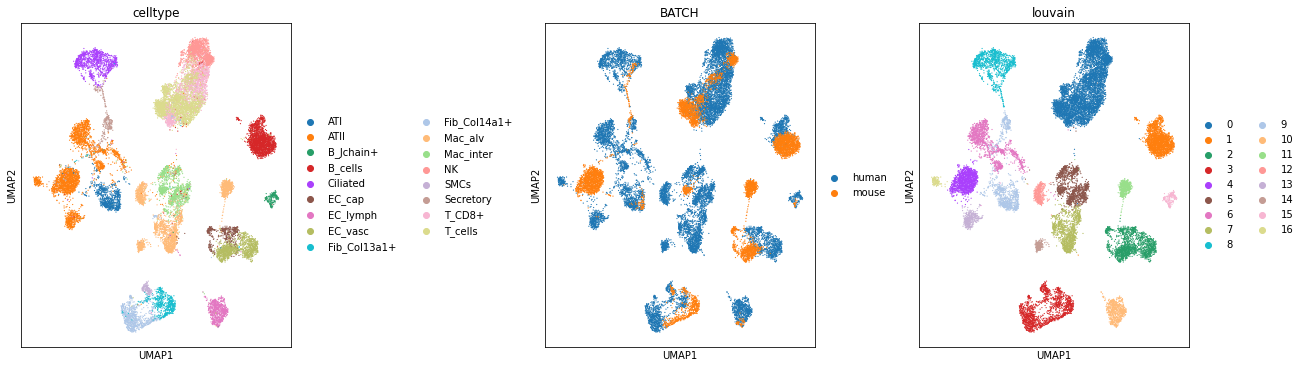

                 fastMNN
ARI                0.551
NMI                0.792
ASW_label          0.624
ASW_label/batch    0.824
BatchKL            0.803
cLISI              1.004
iLISI              1.002


In [4]:
method="fastMNN"
args_integrated=read_dir+method+"/"+dataset+"_"+method+"_corrected.h5ad"

adata_fastMNN=sc.read_h5ad(args_integrated)
print(adata_fastMNN)

adata_mnn=sc.AnnData(adata_fastMNN.obsm["X_mnn"])
adata_mnn.obs=adata_fastMNN.obs.copy()
print(adata_mnn)
# sc.tl.pca(adata_mnn)
# sc.pp.neighbors(adata_mnn)
# sc.tl.umap(adata_mnn)
# sc.pl.umap(adata_mnn,color=["BATCH","celltype"])
########################################################
adata_integrated=adata_mnn.copy()
adata_integrated.obsm["X_emb"]=adata_integrated.X.copy()

adata_integrated,fastMNN_eva=evaluate_dataset(adata_integrated,method=method,n_celltype=ncelltype)
fig, axs = plt.subplots(1, 3, figsize=(18,5),constrained_layout=True)
sc.pl.umap(adata_integrated, color="celltype", title="celltype", ax=axs[0], show=False)#
sc.pl.umap(adata_integrated, color="BATCH", title="BATCH", ax=axs[1], show=False)##
sc.pl.umap(adata_integrated, color="louvain", title="louvain", ax=axs[2], show=False)##
plt.savefig(read_dir+method+"/"+dataset+"_"+method+"_scanpy_vis.png")

plt.show()

fastMNN_eva.to_csv(save_dir+method+"/"+dataset+"_"+method+"_evaluation.csv")
print(fastMNN_eva)
adata_integrated.write_h5ad(save_dir+method+"/"+dataset+"_"+method+"_evaluated.h5ad")

# harmony

AnnData object with n_obs × n_vars = 20760 × 2000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'sampleid', 'cellname', 'celltype', 'species', 'batch', 'BATCH', 'ident'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable'
    obsm: 'X_harmony', 'X_pca', 'X_umap'
    varm: 'HARMONY', 'PCs'
================================Visulizing the embedding data================================
AnnData object with n_obs × n_vars = 20760 × 30
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'sampleid', 'cellname', 'celltype', 'species', 'batch', 'BATCH', 'ident'
...................................................................................................
..........................................method=harmony.............................................
..............................calculate ari nmi according to nceltype=17...........................
louvain clustering result(resolution=0.335693359375):n_cluster=17
ARI: 0.6288174

... storing 'celltype' as categorical
... storing 'BATCH' as categorical


ASW_label= 0.6416458040475845
ASW_label/batch= 0.7916097617722103
....................................... calculate all metric done .................................


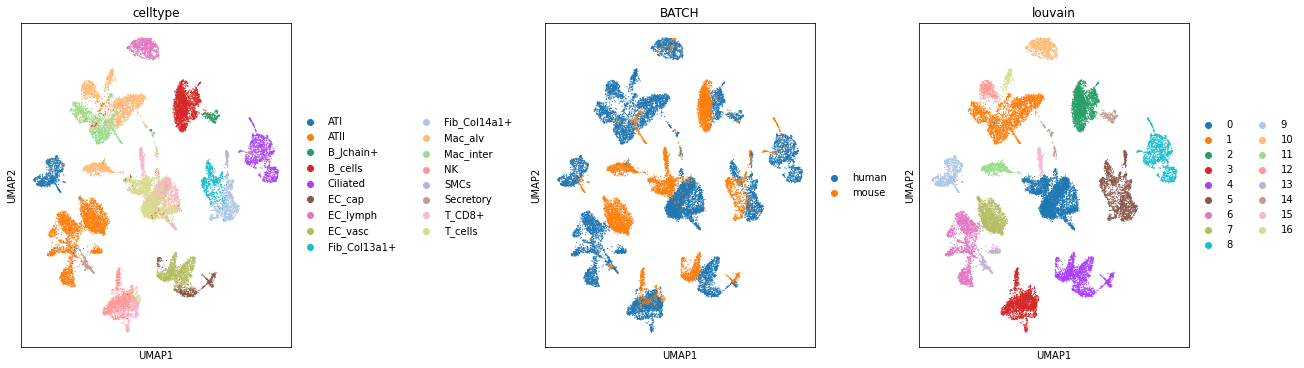

                 harmony
ARI                0.629
NMI                0.785
ASW_label          0.642
ASW_label/batch    0.792
BatchKL            0.809
cLISI              1.008
iLISI              1.003


In [5]:
method="harmony"
args_integrated=read_dir+method+"/"+dataset+"_"+method+"_corrected.h5ad"
adata_integrated=sc.read_h5ad(args_integrated)
print(adata_integrated)
print("================================Visulizing the embedding data================================")
adata_harmony=sc.AnnData(adata_integrated.obsm["X_harmony"])
adata_harmony.obs=adata_integrated.obs.copy()
print(adata_harmony)
# sc.tl.pca(adata_harmony)
# sc.pp.neighbors(adata_harmony)
# sc.tl.umap(adata_harmony)
# sc.pl.umap(adata_harmony,color=["BATCH","celltype"])# python中重新可视化数据，可以与R中对比验证一下

adata_integrated=adata_harmony.copy()

adata_integrated.obsm["X_emb"]=adata_integrated.X.copy()
adata_integrated,harmony_eva=evaluate_dataset(adata_integrated,method=method,n_celltype=ncelltype)
fig, axs = plt.subplots(1, 3, figsize=(18,5),constrained_layout=True)
sc.pl.umap(adata_integrated, color="celltype", title="celltype", ax=axs[0], show=False)#
sc.pl.umap(adata_integrated, color="BATCH", title="BATCH", ax=axs[1], show=False)##
sc.pl.umap(adata_integrated, color="louvain", title="louvain", ax=axs[2], show=False)##
plt.savefig(read_dir+method+"/"+dataset+"_"+method+"_scanpy_vis.png")
#所有的图都是python画的，而没有用原始的图(例如原始的R图)
plt.show()

harmony_eva.to_csv(save_dir+method+"/"+dataset+"_"+method+"_evaluation.csv")
print(harmony_eva)
adata_integrated.write_h5ad(save_dir+method+"/"+dataset+"_"+method+"_evaluated.h5ad")

# Seurat3

AnnData object with n_obs × n_vars = 20760 × 2000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'sampleid', 'cellname', 'celltype', 'species', 'batch', 'BATCH', 'ident'
    var: 'features'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
...................................................................................................
..........................................method=Seurat3.............................................
..............................calculate ari nmi according to nceltype=17...........................
louvain clustering result(resolution=0.3662109375):n_cluster=17
ARI: 0.6431580379878321
NMI: 0.7990570845405611
.................................. calculate BatchKL  .............................................
BatchKL= [1] 0.7838639

.................................. calculate LISI..................................................
clisi= 1.006658084081208
ilisi= 1.0047367206276272
..................................        calculate ASW      ..........

... storing 'orig.ident' as categorical
... storing 'sampleid' as categorical
... storing 'celltype' as categorical
... storing 'species' as categorical
... storing 'batch' as categorical
... storing 'BATCH' as categorical
... storing 'ident' as categorical


ASW_label= 0.62399011105299
ASW_label/batch= 0.807910759632743
....................................... calculate all metric done .................................


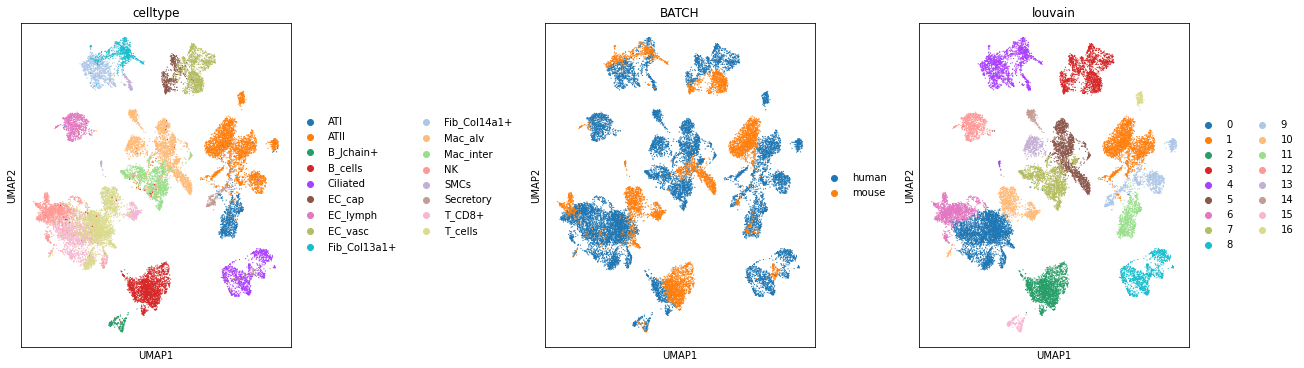

                 Seurat3
ARI                0.643
NMI                0.799
ASW_label          0.624
ASW_label/batch    0.808
BatchKL            0.784
cLISI              1.007
iLISI              1.005


In [6]:
###################################################################
method="Seurat3"
args_integrated=read_dir+method+"/"+dataset+"_"+method+"_corrected.h5ad"
adata_integrated=sc.read_h5ad(args_integrated)
print(adata_integrated)
sc.tl.pca(adata_integrated)
# print("================================Visulizing the embedding data================================")
# sc.pp.neighbors(adata_integrated)
# sc.tl.umap(adata_integrated)
# sc.pl.umap(adata_integrated,color=["BATCH","celltype"])# python中重新可视化数据，可以与R中对比验证一下

adata_integrated.obsm["X_emb"]=adata_integrated.obsm["X_pca"].copy()
adata_integrated,Seurat3_eva=evaluate_dataset(adata_integrated,method=method,n_celltype=ncelltype)
fig, axs = plt.subplots(1, 3, figsize=(18,5),constrained_layout=True)
sc.pl.umap(adata_integrated, color="celltype", title="celltype", ax=axs[0], show=False)#
sc.pl.umap(adata_integrated, color="BATCH", title="BATCH", ax=axs[1], show=False)##
sc.pl.umap(adata_integrated, color="louvain", title="louvain", ax=axs[2], show=False)##
plt.savefig(read_dir+method+"/"+dataset+"_"+method+"_scanpy_vis.png")
plt.show()

Seurat3_eva.to_csv(save_dir+method+"/"+dataset+"_"+method+"_evaluation.csv")
print(Seurat3_eva)

adata_integrated.__dict__['_raw'].__dict__['_var'] = adata_integrated.__dict__['_raw'].__dict__['_var'].rename(columns={'_index': 'features'})
adata_integrated.write_h5ad(save_dir+method+"/"+dataset+"_"+method+"_evaluated.h5ad")

# Scanorama

AnnData object with n_obs × n_vars = 20760 × 1000
    obs: 'BATCH', 'celltype'
    uns: 'BATCH_colors', 'celltype_colors', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'
...................................................................................................
..........................................method=Scanorama.............................................
..............................calculate ari nmi according to nceltype=17...........................
louvain clustering result(resolution=0.48828125):n_cluster=17
ARI: 0.6371626973394465
NMI: 0.7936357680117403
.................................. calculate BatchKL  .............................................
BatchKL= [1] 0.8311119

.................................. calculate LISI..................................................
clisi= 1.0228004966932023
ilisi= 1.0000001192093038
..................................        calculate ASW      ...............

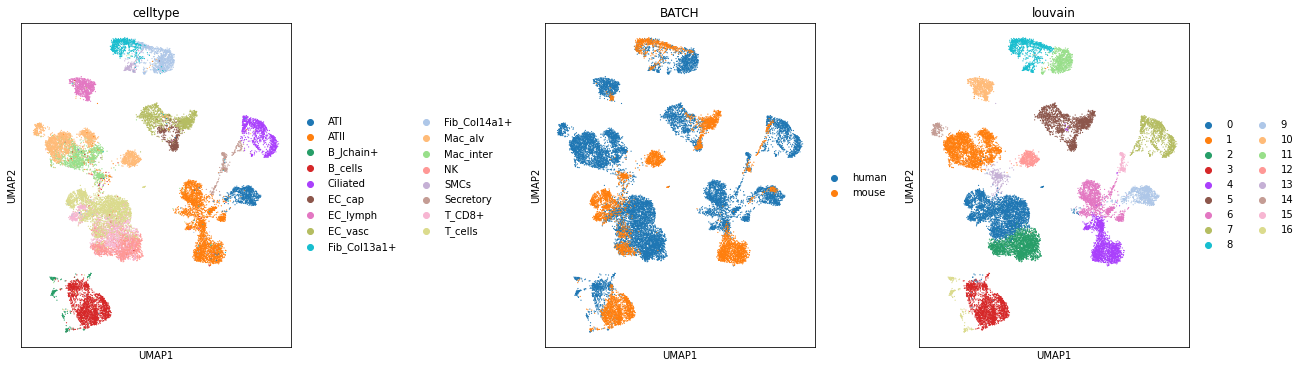

                 Scanorama
ARI                  0.637
NMI                  0.794
ASW_label            0.603
ASW_label/batch      0.778
BatchKL              0.831
cLISI                1.023
iLISI                1.000


In [8]:
###################################################################
method="Scanorama"
args_integrated=read_dir+method+"/"+dataset+"_"+method+"_corrected.h5ad"
adata_integrated=sc.read_h5ad(args_integrated)
print(adata_integrated)
#print("================================Visulizing the embedding data================================")
sc.tl.pca(adata_integrated)
# sc.pp.neighbors(adata_integrated)
# sc.tl.umap(adata_integrated)
# sc.pl.umap(adata_integrated,color=["BATCH","celltype"])#

adata_integrated.obsm["X_emb"]=adata_integrated.obsm["X_pca"].copy()

adata_integrated,scanorama_eva=evaluate_dataset(adata_integrated,method=method,n_celltype=ncelltype)

fig, axs = plt.subplots(1, 3, figsize=(18,5),constrained_layout=True)
sc.pl.umap(adata_integrated, color="celltype", title="celltype", ax=axs[0], show=False)#
sc.pl.umap(adata_integrated, color="BATCH", title="BATCH", ax=axs[1], show=False)##
sc.pl.umap(adata_integrated, color="louvain", title="louvain", ax=axs[2], show=False)##
plt.savefig(read_dir+method+"/"+dataset+"_"+method+"_scanpy_vis.png")

plt.show()

scanorama_eva.to_csv(save_dir+method+"/"+dataset+"_"+method+"_evaluation.csv")
print(scanorama_eva)
adata_integrated.write_h5ad(save_dir+method+"/"+dataset+"_"+method+"_evaluated.h5ad")

# INSCT

AnnData object with n_obs × n_vars = 20760 × 2
    obs: 'BATCH', 'celltype'
    uns: 'BATCH_colors', 'celltype_colors'
    obsm: 'X_emb'
...................................................................................................
..........................................method=INSCT.............................................
..............................calculate ari nmi according to nceltype=17...........................
louvain clustering result(resolution=0.22125244140625):n_cluster=17
ARI: 0.2730505002004529
NMI: 0.425938747243735
.................................. calculate BatchKL  .............................................
BatchKL= [1] 0.4275483

.................................. calculate LISI..................................................
clisi= 2.52152003266453
ilisi= 1.2973869121579702
..................................        calculate ASW      ......................................
Silhouette score...
ASW_label= 0.4181145280599594
ASW_label/batch= 0.59919

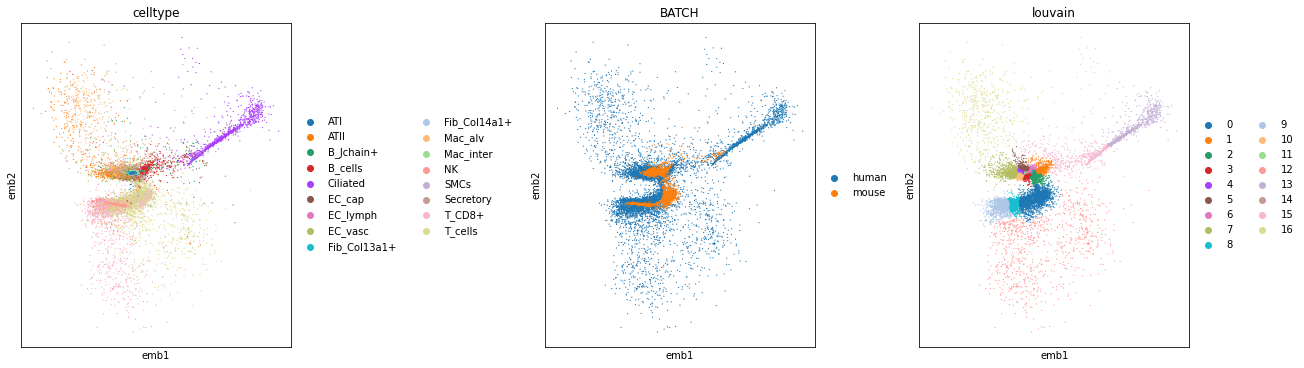

                 INSCT
ARI              0.273
NMI              0.426
ASW_label        0.418
ASW_label/batch  0.599
BatchKL          0.428
cLISI            2.522
iLISI            1.297


In [9]:
method="INSCT"
args_integrated=read_dir+method+"/"+dataset+"_"+method+"_corrected.h5ad"
adata_integrated=sc.read_h5ad(args_integrated)
print(adata_integrated)
# print("================================Visulizing the embedding data================================")
# sc.tl.pca(adata_integrated)
# sc.pp.neighbors(adata_integrated)
# sc.tl.umap(adata_integrated)
# sc.pl.umap(adata_integrated,color=["BATCH","celltype"])#
adata_integrated.obsm["X_emb"]=adata_integrated.X.copy()
adata_integrated,INSCT_eva=evaluate_dataset(adata_integrated,method=method,n_celltype=ncelltype)

fig, axs = plt.subplots(1, 3, figsize=(18,5),constrained_layout=True)
sc.pl.embedding(adata_integrated,basis="emb",color="celltype", title="celltype", ax=axs[0], show=False)#
sc.pl.embedding(adata_integrated,basis="emb",color="BATCH", title="BATCH", ax=axs[1], show=False)##
sc.pl.embedding(adata_integrated,basis="emb",color="louvain", title="louvain", ax=axs[2], show=False)##
plt.savefig(read_dir+method+"/"+dataset+"_"+method+"_scanpy_vis.png")
#所有的图都是python画的，而没有用原始的图(例如原始的R图)
plt.show()

INSCT_eva.to_csv(save_dir+method+"/"+dataset+"_"+method+"_evaluation.csv")
print(INSCT_eva)
adata_integrated.write_h5ad(save_dir+method+"/"+dataset+"_"+method+"_evaluated.h5ad")

# BBKNN

AnnData object with n_obs × n_vars = 20760 × 2
    obs: 'BATCH', 'celltype'
    uns: 'BATCH_colors', 'celltype_colors'
    obsm: 'X_emb'
...................................................................................................
..........................................method=BBKNN.............................................
..............................calculate ari nmi according to nceltype=17...........................
louvain clustering result(resolution=0.1373291015625):n_cluster=17
ARI: 0.501064927815888
NMI: 0.7099144518900203
.................................. calculate BatchKL  .............................................
BatchKL= [1] 0.7832914

.................................. calculate LISI..................................................
clisi= 1.0669073980832047
ilisi= 1.0003560539850218
..................................        calculate ASW      ......................................
Silhouette score...
ASW_label= 0.571525514125824
ASW_label/batch= 0.54382

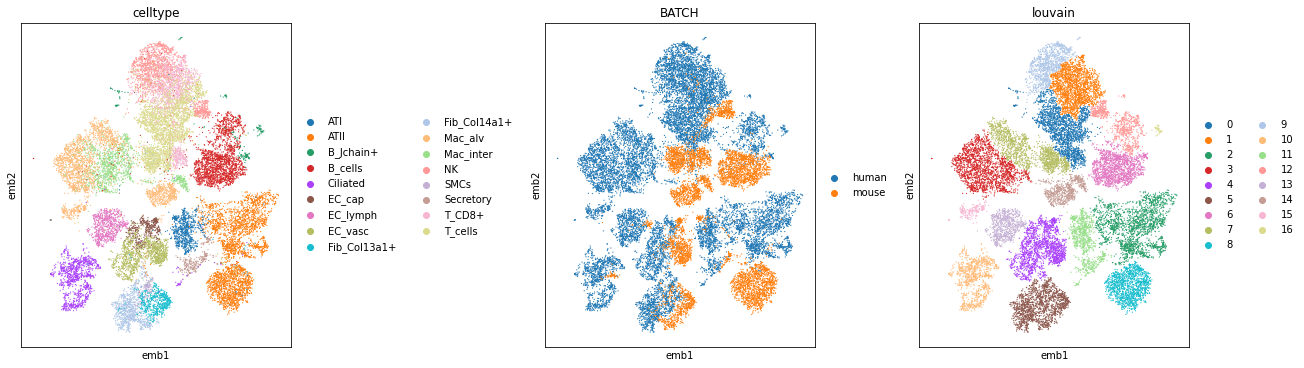

                 BBKNN
ARI              0.501
NMI              0.710
ASW_label        0.572
ASW_label/batch  0.544
BatchKL          0.783
cLISI            1.067
iLISI            1.000


In [10]:
method="BBKNN"
args_integrated=read_dir+method+"/"+dataset+"_"+method+"_corrected.h5ad"
adata_integrated=sc.read_h5ad(args_integrated)
print(adata_integrated)
# print("================================Visulizing the embedding data================================")
# sc.tl.pca(adata_integrated)
# sc.pp.neighbors(adata_integrated)
# sc.tl.umap(adata_integrated)
# sc.pl.umap(adata_integrated,color=["BATCH","celltype"])#
adata_integrated.obsm["X_emb"]=adata_integrated.X.copy()
adata_integrated,BBKNN_eva=evaluate_dataset(adata_integrated,method=method,n_celltype=ncelltype)

fig, axs = plt.subplots(1, 3, figsize=(18,5),constrained_layout=True)
sc.pl.embedding(adata_integrated,basis="emb",color="celltype", title="celltype", ax=axs[0], show=False)#
sc.pl.embedding(adata_integrated,basis="emb",color="BATCH", title="BATCH", ax=axs[1], show=False)##
sc.pl.embedding(adata_integrated,basis="emb",color="louvain", title="louvain", ax=axs[2], show=False)##
plt.savefig(read_dir+method+"/"+dataset+"_"+method+"_scanpy_vis.png")
#所有的图都是python画的，而没有用原始的图(例如原始的R图)
plt.show()

BBKNN_eva.to_csv(save_dir+method+"/"+dataset+"_"+method+"_evaluation.csv")
print(BBKNN_eva)
adata_integrated.write_h5ad(save_dir+method+"/"+dataset+"_"+method+"_evaluated.h5ad")

# Liger

AnnData object with n_obs × n_vars = 20760 × 2000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'sampleid', 'cellname', 'celltype', 'species', 'batch', 'BATCH', 'ident', 'clusters'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable'
    obsm: 'X_iNMF', 'X_iNMF_raw', 'X_umap'
    varm: 'INMF_RAW'
================================Visulizing the embedding data================================
AnnData object with n_obs × n_vars = 20760 × 20
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'sampleid', 'cellname', 'celltype', 'species', 'batch', 'BATCH', 'ident', 'clusters'
...................................................................................................
..........................................method=liger.............................................
..............................calculate ari nmi according to nceltype=17...........................
louvain clustering result(resolution=0.3662109375):n_cluster=1

... storing 'celltype' as categorical
... storing 'BATCH' as categorical


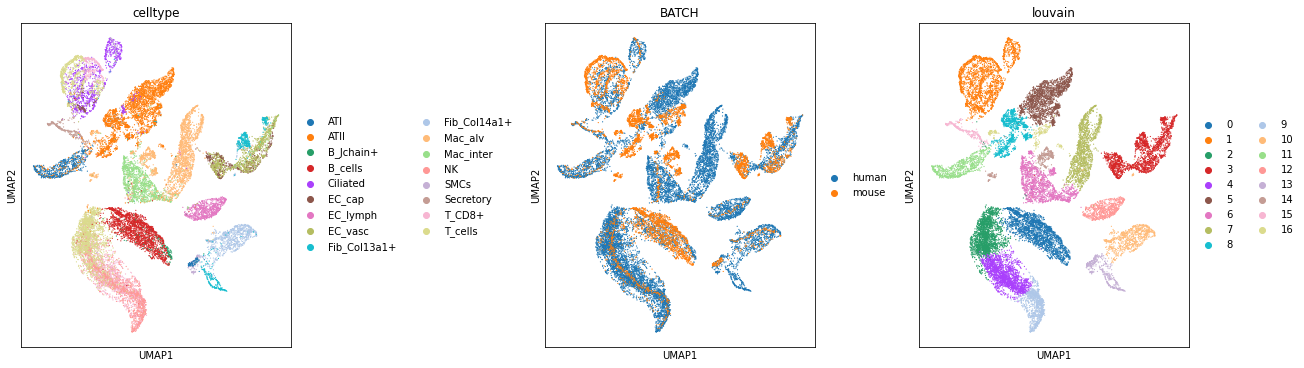

                 liger
ARI              0.555
NMI              0.729
ASW_label        0.579
ASW_label/batch  0.573
BatchKL          0.624
cLISI            1.109
iLISI            1.130


In [11]:
method="liger"
args_integrated=read_dir+method+"/"+dataset+"_"+method+"_corrected.h5ad"
adata_integrated=sc.read_h5ad(args_integrated)
print(adata_integrated)
print("================================Visulizing the embedding data================================")
adata_liger=sc.AnnData(adata_integrated.obsm["X_iNMF"])
adata_liger.obs=adata_integrated.obs.copy()
print(adata_liger)
# sc.tl.pca(adata_liger)
# sc.pp.neighbors(adata_liger)
# sc.tl.umap(adata_liger)
# sc.pl.umap(adata_liger,color=["BATCH","celltype"])# python中重新可视化数据，可以与R中对比验证一下

adata_integrated=adata_liger.copy()

adata_integrated.obsm["X_emb"]=adata_integrated.X.copy()

adata_integrated,liger_eva=evaluate_dataset(adata_integrated,method=method,n_celltype=ncelltype)
fig, axs = plt.subplots(1, 3, figsize=(18,5),constrained_layout=True)
sc.pl.umap(adata_integrated, color="celltype", title="celltype", ax=axs[0], show=False)#
sc.pl.umap(adata_integrated, color="BATCH", title="BATCH", ax=axs[1], show=False)##
sc.pl.umap(adata_integrated, color="louvain", title="louvain", ax=axs[2], show=False)##
plt.savefig(read_dir+method+"/"+dataset+"_"+method+"_scanpy_vis.png")
#所有的图都是python画的，而没有用原始的图(例如原始的R图)
plt.show()

liger_eva.to_csv(save_dir+method+"/"+dataset+"_"+method+"_evaluation.csv")
print(liger_eva)
adata_integrated.write_h5ad(save_dir+method+"/"+dataset+"_"+method+"_evaluated.h5ad")

# BERMUDA

../evaluation/Lung_two_species/BERMUDA/Lung_two_species_BERMUDA_corrected.h5ad
AnnData object with n_obs × n_vars = 20760 × 20
    obs: 'celltype', 'BATCH'
    uns: 'BATCH_colors', 'celltype_colors'
    obsm: 'X_umap'
...................................................................................................
..........................................method=BERMUDA.............................................
..............................calculate ari nmi according to nceltype=17...........................
louvain clustering result(resolution=0.54931640625):n_cluster=17
ARI: 0.6307389230342335
NMI: 0.7818854578091509
.................................. calculate BatchKL  .............................................
BatchKL= [1] 0.6981549

.................................. calculate LISI..................................................
clisi= 1.058467570272308
ilisi= 1.0755115817244212
..................................        calculate ASW      ...............................

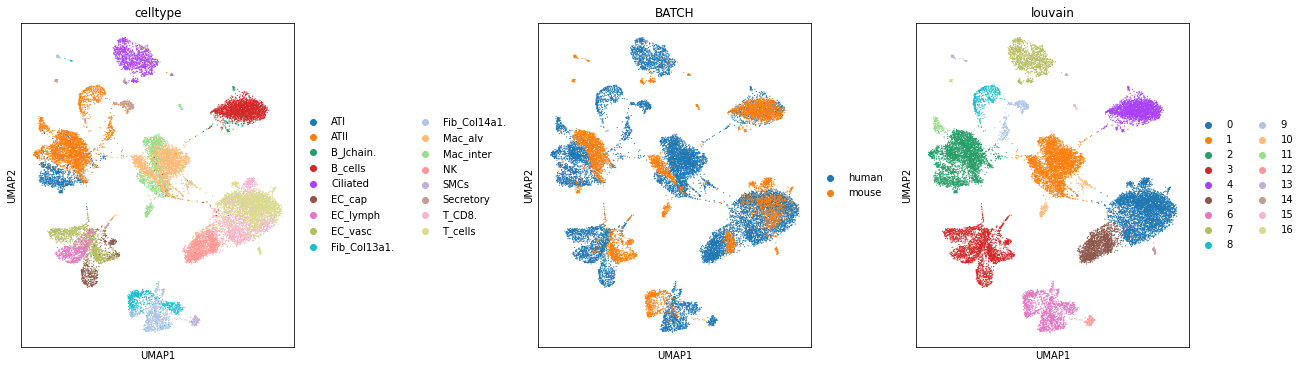

                 BERMUDA
ARI                0.631
NMI                0.782
ASW_label          0.528
ASW_label/batch    0.728
BatchKL            0.698
cLISI              1.058
iLISI              1.076


In [12]:
method="BERMUDA"
args_integrated=read_dir+method+"/"+dataset+"_"+method+"_corrected.h5ad"
if(os.path.exists(args_integrated)):
    print(args_integrated)
    adata_integrated=sc.read_h5ad(args_integrated)
    print(adata_integrated)
    #print("================================Visulizing the embedding data================================")
    # sc.tl.pca(adata_integrated)
    # sc.pp.neighbors(adata_integrated)
    # sc.tl.umap(adata_integrated)
    # sc.pl.umap(adata_integrated,color=["BATCH","celltype"])#
    adata_integrated.obsm["X_emb"]=adata_integrated.X.copy()
    adata_integrated,bermuda_eva=evaluate_dataset(adata_integrated,method=method,n_celltype=ncelltype)

    fig, axs = plt.subplots(1, 3, figsize=(18,5),constrained_layout=True)
    sc.pl.umap(adata_integrated, color="celltype", title="celltype", ax=axs[0], show=False)#
    sc.pl.umap(adata_integrated, color="BATCH", title="BATCH", ax=axs[1], show=False)##
    sc.pl.umap(adata_integrated, color="louvain", title="louvain", ax=axs[2], show=False)##
    plt.savefig(read_dir+method+"/"+dataset+"_"+method+"_scanpy_vis.png")
    plt.show()
    bermuda_eva.to_csv(save_dir+method+"/"+dataset+"_"+method+"_evaluation.csv")
    print(bermuda_eva)
    adata_integrated.write_h5ad(save_dir+method+"/"+dataset+"_"+method+"_evaluated.h5ad")
else:
    fig, axs = plt.subplots(1, 3, figsize=(18,5),constrained_layout=True)
    plt.savefig(read_dir+method+"/"+dataset+"_"+method+"_scanpy_vis.png")
    plt.show()    
    results = {
    'ARI': "--",
    'NMI': "--",
    'ASW_label': "--",
    'ASW_label/batch': "--",
    #'kBET': kBET_value[0],
     'BatchKL':"--",
     'cLISI':"--",  
     'iLISI':"--"
    }
    print("....................................... calculate all metric done .................................")
    bermuda_eva = pd.DataFrame.from_dict(results, orient='index')
    bermuda_eva.columns=[method]
    bermuda_eva.to_csv(save_dir+method+"/"+dataset+"_"+method+"_evaluation.csv")
    bermuda_eva
    #scDML_reassign

# scVI

AnnData object with n_obs × n_vars = 20760 × 10
    obs: 'BATCH', 'celltype'
    uns: 'BATCH_colors', 'celltype_colors', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'
...................................................................................................
..........................................method=scVI.............................................
..............................calculate ari nmi according to nceltype=17...........................
louvain clustering result(resolution=0.48828125):n_cluster=17
ARI: 0.6134657101143417
NMI: 0.7797028206015784
.................................. calculate BatchKL  .............................................
BatchKL= [1] 0.7638195

.................................. calculate LISI..................................................
clisi= 1.014084910819822
ilisi= 1.0098904860224642
..................................        calculate ASW      .......................

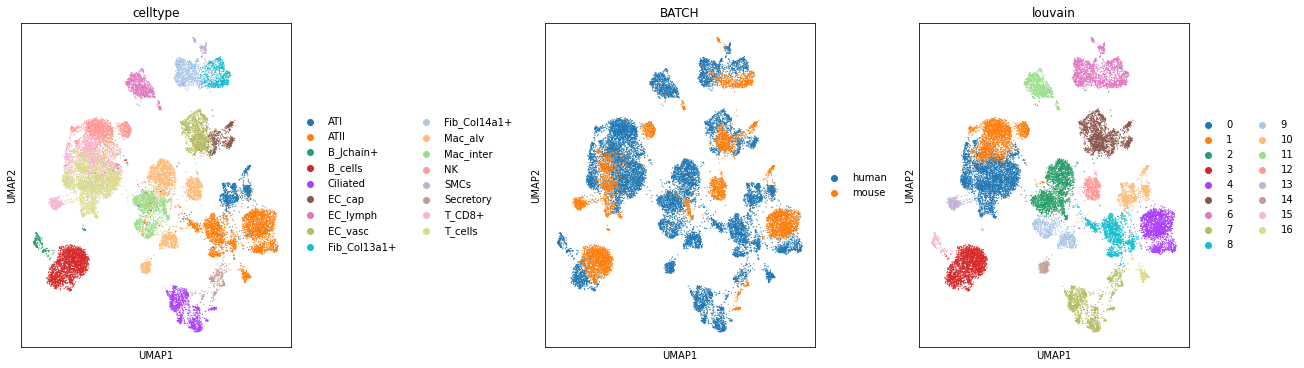

                  scVI
ARI              0.613
NMI              0.780
ASW_label        0.599
ASW_label/batch  0.771
BatchKL          0.764
cLISI            1.014
iLISI            1.010


In [13]:
method="scVI"
args_integrated=read_dir+method+"/"+dataset+"_"+method+"_corrected.h5ad"
adata_integrated=sc.read_h5ad(args_integrated)
print(adata_integrated)
#print("================================Visulizing the embedding data================================")
# sc.tl.pca(adata_integrated)
# sc.pp.neighbors(adata_integrated)
# sc.tl.umap(adata_integrated)
# sc.pl.umap(adata_integrated,color=["BATCH","celltype"])#
adata_integrated.obsm["X_emb"]=adata_integrated.X.copy()
adata_integrated,scVI_eva=evaluate_dataset(adata_integrated,method=method,n_celltype=ncelltype)

fig, axs = plt.subplots(1, 3, figsize=(18,5),constrained_layout=True)
sc.pl.umap(adata_integrated, color="celltype", title="celltype", ax=axs[0], show=False)#
sc.pl.umap(adata_integrated, color="BATCH", title="BATCH", ax=axs[1], show=False)##
sc.pl.umap(adata_integrated, color="louvain", title="louvain", ax=axs[2], show=False)##
plt.savefig(read_dir+method+"/"+dataset+"_"+method+"_scanpy_vis.png")
plt.show()

scVI_eva.to_csv(save_dir+method+"/"+dataset+"_"+method+"_evaluation.csv")
print(scVI_eva)
adata_integrated.write_h5ad(save_dir+method+"/"+dataset+"_"+method+"_evaluated.h5ad")

# summary evaluation of all method to  table

In [15]:
#method_list=["tDCA","fastMNN","harmony","Seurat3","scanorama","INSCT","scVI","BBKNN","liger"]
method_list=["scDML","fastMNN","harmony","Seurat3","Scanorama","INSCT","BBKNN","liger","BERMUDA","scVI"]

df_ls=[]
for method in method_list:
    print(method)
    if(method=="scDML"):
        method_eva1=pd.read_csv(save_dir+method+"/"+dataset+"_"+method+"(reassign)_evaluation.csv",index_col=0)
        df_ls.append(method_eva1)
        method_eva2=pd.read_csv(save_dir+method+"/"+dataset+"_"+method+"(louvain)_evaluation.csv",index_col=0)
        df_ls.append(method_eva2)
    else:
        method_eva=pd.read_csv(save_dir+method+"/"+dataset+"_"+method+"_evaluation.csv",index_col=0)
        df_ls.append(method_eva)

result = pd.concat(df_ls, join='outer', axis=1)
result.columns=["scDML(reassign)","scDML(louvain)"]+method_list[1:]
result.index.name=dataset ## add title for column names 
#result=result.round(3) ## only save 3 precision of float
result.to_csv(save_dir+dataset+"_evaluation.csv")
result
#liger

scDML
fastMNN
harmony
Seurat3
Scanorama
INSCT
BBKNN
liger
BERMUDA
scVI


,scDML(reassign),scDML(louvain),fastMNN,harmony,Seurat3,Scanorama,INSCT,BBKNN,liger,BERMUDA,scVI
Lung_two_species,,,,,,,,,,,
ARI,0.631,0.631,0.551,0.629,0.643,0.637,0.273,0.501,0.555,0.631,0.613
NMI,0.818,0.817,0.792,0.785,0.799,0.794,0.426,0.710,0.729,0.782,0.780
ASW_label,--,0.624,0.624,0.642,0.624,0.603,0.418,0.572,0.579,0.528,0.599
ASW_label/batch,--,0.787,0.824,0.792,0.808,0.778,0.599,0.544,0.573,0.728,0.771
BatchKL,--,0.591,0.803,0.809,0.784,0.831,0.428,0.783,0.624,0.698,0.764
cLISI,--,1.139,1.004,1.008,1.007,1.023,2.522,1.067,1.109,1.058,1.014
iLISI,--,1.125,1.002,1.003,1.005,1.000,1.297,1.000,1.130,1.076,1.010


# Visulization of Evaluation

## ARI and NMI

In [ ]:
# #colors=['black','red',"blue","orange","green","purple","yellow","pink","brown"]
# colors=['black','red',"blue","orange","green","purple","yellow","pink","cyan","gray"]
# plt.figure(figsize=(6,6))
# ax=plt.subplot(1, 1, 1) 
# ARI_list=result.loc["ARI"].values
# NMI_list=result.loc["NMI"].values
# Name_list = list(result.columns)
# ax.scatter(ARI_list, NMI_list, c = colors) 
# ax.set_xlabel("ARI", fontsize = 10)
# ax.set_ylabel("NMI", fontsize = 10)
# plt.xticks(fontsize = 10)
# plt.yticks(fontsize = 10)
# for i in range(len(ARI_list)):
#     ax.text(ARI_list[i], NMI_list[i], Name_list[i], c=colors[i],  fontsize=15, weight = 1000, verticalalignment='center', horizontalalignment='right',rotation=0)
# plt.title("Clustering Accuracy")    
# plt.savefig(save_dir+dataset+"_ARI_NMI.png")
# # ax=plt.subplot(1, 3, 3) 
# # kBET_list=result.loc["kBET"].values
# # batchKL_list=result.loc["BatchKL"].values
# # Name_list = list(result.columns)
# # ax.scatter(kBET_list, batchKL_list, c = colors) 
# # ax.set_xlabel("kBET", fontsize = 10)
# # ax.set_ylabel("BatchKL", fontsize = 10)
# # plt.xticks(fontsize = 10)
# # plt.yticks(fontsize = 10)
# # for i in range(len(kBET_list)):
# #     ax.text(kBET_list[i], batchKL_list[i], Name_list[i], c=colors[i],  fontsize=20, weight =1000, verticalalignment='center', horizontalalignment='right',rotation=0)
# # plt.title("Mixing Accuracy")

## ASW

In [ ]:
# # Plot LISI results 
# #colors=['black','red',"blue","orange","green","purple","yellow","pink","brown"]
# colors=['black','red',"blue","orange","green","purple","yellow","pink","cyan","gray"]
# plt.figure(figsize=(6,6))
# ax=plt.subplot(1, 1, 1) 
# ASW_list=result.loc["ASW_label"].values
# ASW_batch_list=1-result.loc["ASW_label/batch"].values
# Name_list = list(result.columns)
# ax.scatter(ASW_list, ASW_batch_list, c = colors) 
# ax.set_xlabel("ASW_label", fontsize = 10)
# ax.set_ylabel("1-ASW_label/batch", fontsize = 10)
# plt.xticks(fontsize = 10)
# plt.yticks(fontsize = 10)
# for i in range(len(ASW_list)):
#     ax.text(ASW_list[i], ASW_batch_list[i], Name_list[i], c=colors[i],  fontsize=15, weight = 1000, verticalalignment='center', horizontalalignment='right',rotation=0)
# plt.title("ASW")
# plt.savefig(save_dir+dataset+"_ASW.png")


## batchKL

In [ ]:
# fig=plt.figure(figsize=(6,6))
# ax=plt.subplot(1, 1, 1) 
# bKL=pd.DataFrame({"method":result.columns,"BatchKL":result.loc["BatchKL"].values})
# #bKL
# ax = sns.barplot(x = "method", y = "BatchKL", data=bKL)
# ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
# plt.ylabel("BatchKL", fontsize = 10)
# plt.xticks(fontsize = 10)
# plt.yticks(fontsize = 10)
# plt.title("BatchKL")
# plt.savefig(save_dir+dataset+"_BatchKL.png")

## iLISI和cLISI

In [ ]:
# #colors=['black','red',"blue","orange","green","purple","yellow","pink","brown"]
# colors=['black','red',"blue","orange","green","purple","yellow","pink","cyan","gray"]
# plt.figure(figsize=(6,6))
# ax=plt.subplot(1, 1, 1) 
# cLISI_list=result.loc["cLISI"].values
# iLISI_list=result.loc["iLISI"].values
# Name_list = list(result.columns)
# ax.scatter(cLISI_list, iLISI_list, c = colors) 
# ax.set_xlabel("cLISI", fontsize = 10)
# ax.set_ylabel("iLISI", fontsize = 10)
# plt.xticks(fontsize = 10)
# plt.yticks(fontsize = 10)
# for i in range(len(cLISI_list)):
#     ax.text(cLISI_list[i], iLISI_list[i], Name_list[i], c=colors[i],  fontsize=15, weight = 1000, verticalalignment='center', horizontalalignment='right',rotation=0)
# plt.title("LISI")    
# plt.savefig(save_dir+dataset+"_LISI.png")